Article source:

https://mubaris.com/posts/linear-regression/

https://medium.com/analytics-vidhya/linear-regression-in-python-from-scratch-24db98184276

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import os

matplotlib.rcParams['animation.embed_limit'] = 2**128

# Dataset reading
dataset = pd.read_csv("dataset.csv", sep=",", header=[0])

In [2]:
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


Find out the relationship between the Head Size and Brian Weight

Text(0, 0.5, 'Brain Weight(grams)')

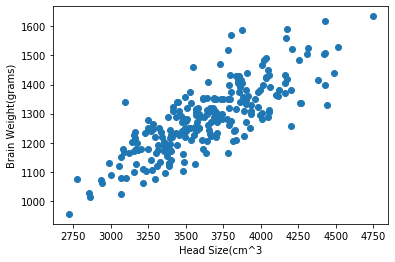

In [3]:
x = dataset["Head Size(cm^3)"].values
y = dataset["Brain Weight(grams)"].values

plt.scatter(x,y)
plt.xlabel("Head Size(cm^3")
plt.ylabel("Brain Weight(grams)")

## Least Square Method

RMSE is 72.1206213783709
R2 is 0.6393117199570003
0.26342933948939945 325.57342104944223


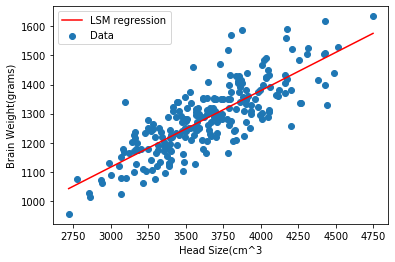

In [4]:
num_x = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
beta_1_numer = 0
beta_1_denom = 0
beta_0 = 0
for i in range(num_x):
    beta_1_numer += (x[i]-x_mean)*(y[i]-y_mean)
    beta_1_denom += (x[i]-x_mean)**2
beta_1 = beta_1_numer/beta_1_denom
beta_0 = y_mean - beta_1*x_mean

x_a = np.linspace(min(x), max(x), 100)
plt.scatter(x,y, label="Data")
plt.plot(x_a, x_a*beta_1 + beta_0, 'r-', label="LSM regression")
plt.xlabel("Head Size(cm^3")
plt.ylabel("Brain Weight(grams)")
plt.legend()

# Assess the Root Mean Squared Error
RMSE = 0
for i in range(num_x):
    y_predict = x[i]*beta_1 + beta_0
    RMSE += (y_predict-y[i])**2
RMSE = np.sqrt(RMSE/num_x)
print("RMSE is {}".format(RMSE))

# R2 score
sst = 0
ssr = 0
for i in range(num_x):
    y_predict = x[i]*beta_1 + beta_0
    sst += (y[i] - y_mean)**2
    ssr += (y[i] - y_predict)**2
r2 = 1-(ssr/sst)
print("R2 is {}".format(r2))
print(beta_1, beta_0)

## Gradient Descent Approach

72.1206213783709
0.639311719957


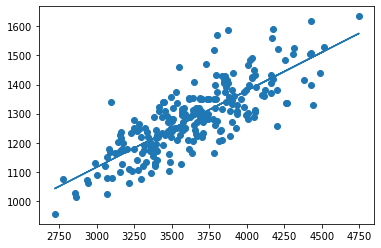

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
x = x.reshape((num_x, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(x, y)
# Y Prediction
y_pred = reg.predict(x)

# Calculating RMSE and R2 Score
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2_score = reg.score(x, y)

plt.scatter(x,y)
plt.plot(x,y_pred)
print(np.sqrt(mse))
print(r2_score)

## Gradient Descent Approach from Scratch

$$h_{\theta}(x) = \theta_1 x + \theta_0 $$

Iteration: 1,Cost = 62754.53626352663,theta = [4.99999897e+02 1.21057895e-01]


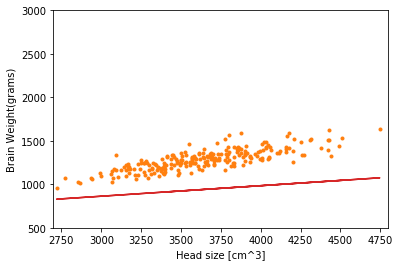

Iteration: 1001,Cost = 2752.2051516560036,theta = [4.99999749e+02 2.15908851e-01]


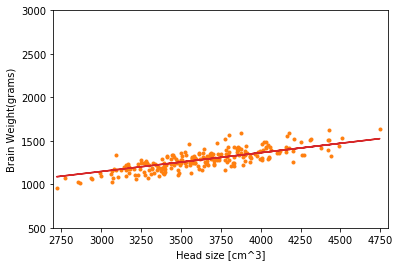

Iteration: 2001,Cost = 2752.204849844328,theta = [4.99999575e+02 2.15908898e-01]


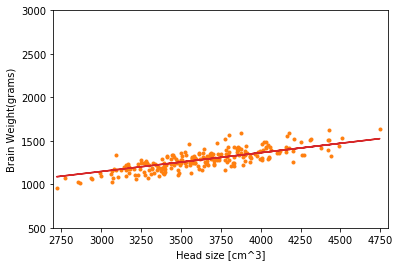

Iteration: 3001,Cost = 2752.2045480332536,theta = [4.99999401e+02 2.15908946e-01]


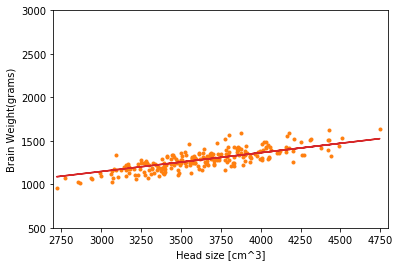

Iteration: 4001,Cost = 2752.2042462227805,theta = [4.99999228e+02 2.15908993e-01]


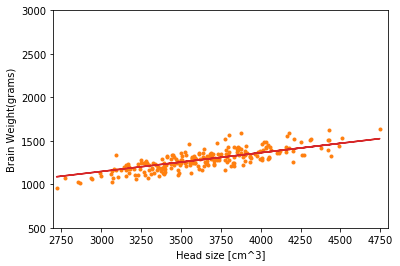

Iteration: 5001,Cost = 2752.2039444129096,theta = [4.99999054e+02 2.15909040e-01]


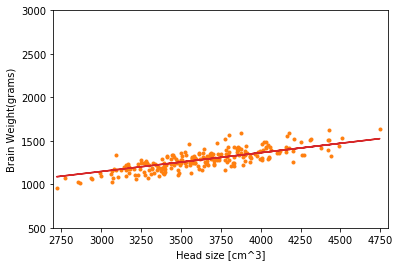

Iteration: 6001,Cost = 2752.2036426036375,theta = [4.99998880e+02 2.15909088e-01]


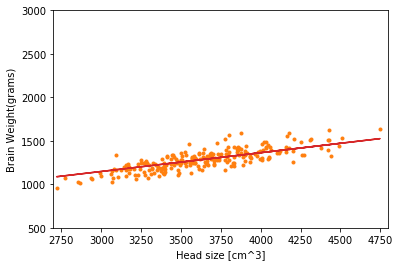

Iteration: 7001,Cost = 2752.20334079497,theta = [4.99998706e+02 2.15909135e-01]


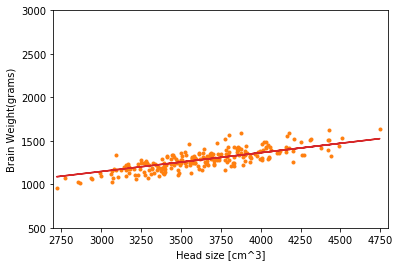

Iteration: 8001,Cost = 2752.2030389869,theta = [4.99998533e+02 2.15909182e-01]


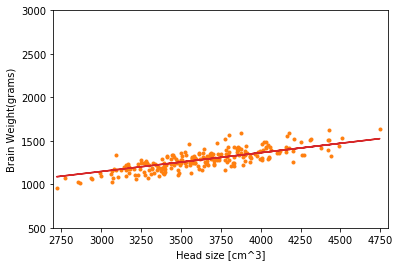

Iteration: 9001,Cost = 2752.2027371794325,theta = [4.99998359e+02 2.15909230e-01]


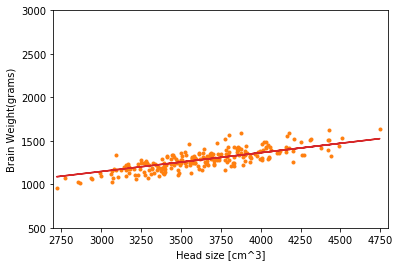

In [6]:
def predict_y(x, theta):
    y = np.dot(x,theta)
    return y

def calculate_cost(x, theta, y_actual):
    y_predict = predict_y(x, theta)
    #print(y_predict)
    cost = ((y_predict - y_actual)**2).mean()/2
    return cost
    
def abline(x,theta,y_actual):
    """Plot a line from slope and intercept"""
    
    y_vals = predict_y(x,theta)
    plt.xlim(2700, 4800)
    plt.ylim(500, 3000)
    plt.xlabel('Head size [cm^3]')
    plt.ylabel('Brain Weight(grams)')
    #plt.gca().set_aspect(0.1, adjustable='datalim')
    plt.plot(x,y_actual,'.',x, y_vals, '-')
    plt.show()
    
def GD_linear_regression(theta, alpha=0.0000001, iter=10000):
    theta_0 = []
    theta_1 = []
    costs = []
    x_data = dataset["Head Size(cm^3)"]
    y_data = dataset["Brain Weight(grams)"]
    x = np.column_stack((np.ones(len(x_data)),x_data))
    theta = np.array(theta) # initialization
    
    for i in range(iter):
        y_predict = predict_y(x, theta)
        t_0 = theta[0] - alpha *(y_predict - y_data).mean()
        t_1 = theta[1] - alpha *((y_predict - y_data)* x[:,1]).mean()
        #print(t_0, t_1)
        theta = np.array([t_0, t_1])
        J = calculate_cost(x, theta, y_data)
        theta_0.append(t_0)
        theta_1.append(t_1)
        costs.append(J)
        if i%1000==0:
            print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            abline(x,theta,y_data)  
            
GD_linear_regression(theta=[500,0.5])

The previous code does not normalize the data and therefore it' very slow to update theta_0

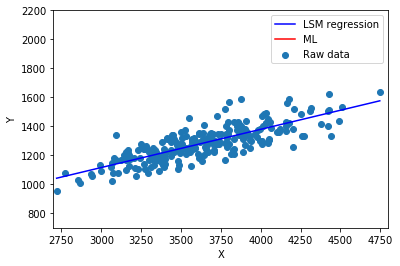

In [7]:
def predict_y(x, theta):
    y = np.dot(x,theta)
    return y

def calculate_cost(x, theta, y_actual):
    y_predict = predict_y(x, theta)
    #print(y_predict)
    cost = ((y_predict - y_actual)**2).mean()/2
    return cost

def GD_linear_regression(theta, alpha=0.5, iter=2000):
    theta_0 = []
    theta_1 = []
    costs = []
    x_data_o = dataset["Head Size(cm^3)"].values
    x_max = max(x_data_o)    
    x_data = x_data_o/x_max
    #print(max(x_data))
    
    y_data_o = dataset["Brain Weight(grams)"].values
    y_max = max(y_data_o)
    y_data = y_data_o/y_max
    
    
    #print(x_data.shape)
    x = np.column_stack((np.ones(len(x_data)),x_data))
    theta = np.array(theta) # initialization
    
    fig, ax = plt.subplots(1, figsize=[6,4])
    ax.set_xlim(2700,4800)
    ax.set_ylim(700,2200)
    ax.scatter(x_data_o, y_data_o, label="Raw data")
    ax.plot(x_a, x_a*beta_1 + beta_0, 'b-', label="LSM regression")
    line, = ax.plot([], [], 'r', label="ML")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    
    # initialization function: plot the background of each frame
    def init():
        line.set_data([], [])
        return (line,)

    # animation function. This is called sequentially
    def animate(i, x_data, theta_0, theta_1, x_max, y_max):
        y_predict = theta_1[i]*x_data + theta_0[i]
        line.set_data(x_data*x_max, y_predict*y_max)
        ax.set_title("Iteration={}".format(i+1))
        return (line,)    

    for i in range(iter):
        y_predict = predict_y(x, theta)
        t_0 = theta[0] - alpha *(y_predict - y_data).mean()
        t_1 = theta[1] - alpha *((y_predict - y_data)* x[:,1]).mean()
        #print(t_0, t_1)
        theta = np.array([t_0, t_1])
        J = calculate_cost(x, theta, y_data)
        theta_0.append(t_0)
        theta_1.append(t_1)
        costs.append(J)
        #if i%100==0:
            #print(f"Iteration: {i+1},Cost = {J},theta = {theta}")
            #abline(x,theta,y_data) 
            #plt.figure()
            #plt.plot(x_data*x_max,y_data*y_max,'r.')
            #plt.plot(x_data*x_max,y_predict*y_max,'k-')
            #plt.plot(x_a, x_a*beta_1 + beta_0, 'b-', label="LSM regression")
            #plt.xlim()
            #plt.ylim(500,2500)
    
    
    anim = animation.FuncAnimation(fig, animate,fargs=[x_data, theta_0, theta_1, x_max, y_max], init_func=init,
                               frames=iter, interval=10, blit=True) 
    return anim
    
anim = GD_linear_regression(theta=[0.8,0.8])

### Run the code below to show the animation (not run to save space for hosting online)

In [ ]:
HTML(anim.to_jshtml())